# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Assignment_6</b></u>

### Roster Name: GURSIMRAN SINGH
### Preferred Name (if different): SIMRAN
### Email address: gursimransingh@sjsu.edu


##  <u>References and sources </u>

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

##  <u>Solution</u>

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

######## in this problem we have number ranging from 1-9 , and we have to use single layer perceptron model which isa binary classifier for the predicitons

######### The MNIST database (Modified National Institute of Standards and Technology database is a large database of handwritten digits that is commonly used for training various image processing systems

In [18]:
digits = load_digits(as_frame=True)

In [19]:
digits.data.head()



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [20]:
scaler=StandardScaler()
normalized_data = scaler.fit_transform(digits.data)

In [21]:
digits.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [22]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


####### Converting the output data into binary form using one hot encoding

In [23]:
new_data=pd.get_dummies(digits.target,columns=digits.target[0:])
print(new_data.head())
new_data.shape
#new_data.columns

print(new_data[0])

   0  1  2  3  4  5  6  7  8  9
0  1  0  0  0  0  0  0  0  0  0
1  0  1  0  0  0  0  0  0  0  0
2  0  0  1  0  0  0  0  0  0  0
3  0  0  0  1  0  0  0  0  0  0
4  0  0  0  0  1  0  0  0  0  0
0       1
1       0
2       0
3       0
4       0
       ..
1792    0
1793    1
1794    0
1795    0
1796    0
Name: 0, Length: 1797, dtype: uint8


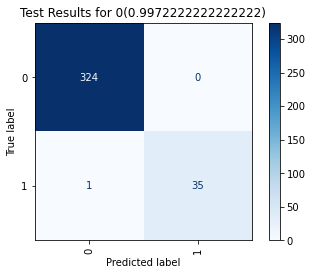

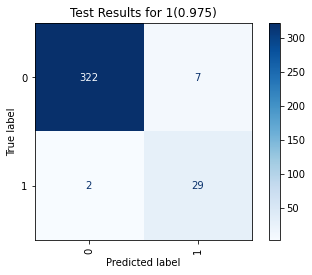

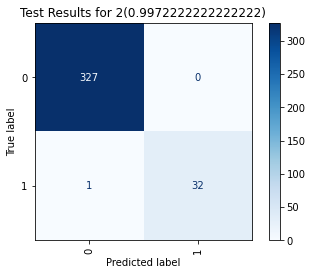

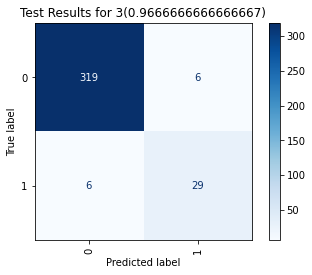

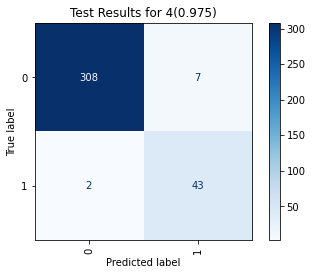

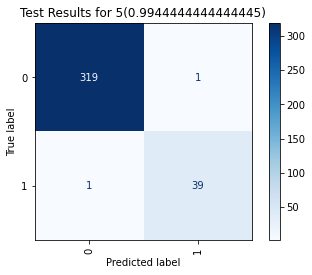

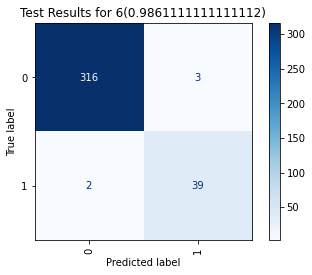

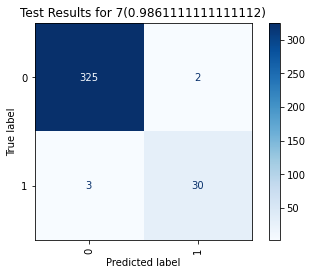

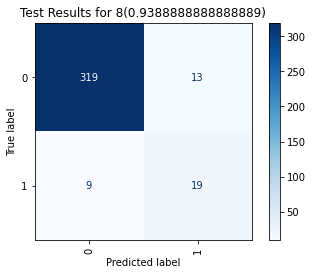

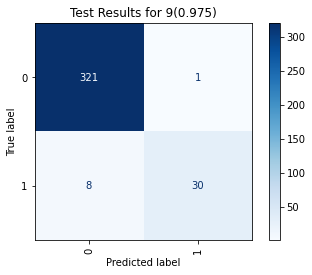

In [24]:
for x in range(0, 10):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(normalized_data,new_data[x],random_state= 0 , test_size=0.2 ,stratify =new_data[0] )
    model = Perceptron(tol=1e-3, random_state=0)
    model.fit(Xtrain, Ytrain)
    pred_values = model.predict(Xtest)
    disp = plot_confusion_matrix(model, Xtest, Ytest, cmap=plt.cm.Blues, normalize=None, xticks_rotation='vertical')
    disp.ax_.set_title("Test Results for " + str(x) + "("+ str( accuracy_score(Ytest, pred_values)) +")")

    plt.show
    
